#Import

In [15]:
%%bash
sudo apt-get install -y xvfb x11-utils
sudo pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists...
Building dependency tree...
Reading state information...
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install pyvirtualdisplay==0.2.*
# !pip install gym



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import pyvirtualdisplay
import gym
import matplotlib.pyplot as plt
from IPython import display
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

<Figure size 640x480 with 0 Axes>

In [20]:
from matplotlib.animation import FuncAnimation

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

# OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI Gym comes into play. It's a Python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)


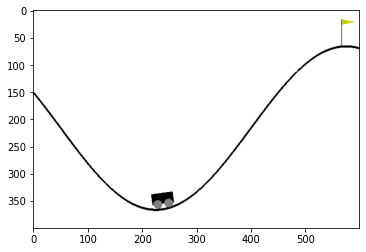

In [21]:
import gym

env = gym.make("MountainCar-v0")
env.reset()
plt.imshow(env.render("rgb_array"))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* `reset()`: reset environment to the initial state, _return first observation_
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action `a` and return `(new_observation, reward, is_done, info)`
 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `is_done`: True if the MDP has just finished, False if still in progress
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

In [22]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.58881599  0.        ]


In [23]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.58732997  0.00148601]
reward: -1.0
is game over?: False


### Play with it

Below is the code that drives the car to the right. However, if you simply use the default policy, the car will not reach the flag at the far right due to gravity.

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You are not required to build any sophisticated algorithms for now, and you definitely don't need to know any reinforcement learning for this. Feel free to hard-code :)

In [24]:
from IPython import display

# Create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}

In [25]:
def policy(obs, t):
    if t > 50 and t < 100:
        return actions['left']
    else:
        return actions['right']

In [26]:
frames = []

obs = env.reset()
frames.append(env.render(mode='rgb_array'))
for t in range(TIME_LIMIT):
    
    action = policy(obs, t)
    obs, reward, done, _ = env.step(action)
    frames.append(env.render(mode='rgb_array'))
    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

Well done!


In [27]:
assert obs[0] > 0.47
print("You solved it!")

You solved it!


In [28]:
anim = plot_animation(frames)

from IPython.display import HTML
HTML(anim.to_html5_video())